<a href="https://colab.research.google.com/github/ccasado/bootcamp-dados/blob/main/BootcampDados_Aula3_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv", encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", engine='python', skipfooter=12,
                    thousands=".", decimal=",")




In [19]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)

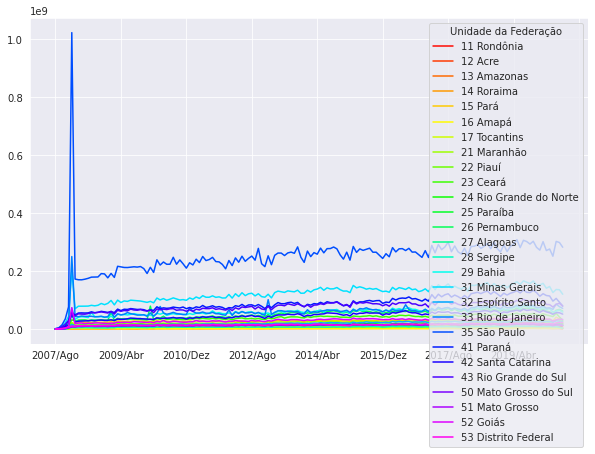

In [20]:
usaveis.T.plot(figsize=(10,6))

###Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

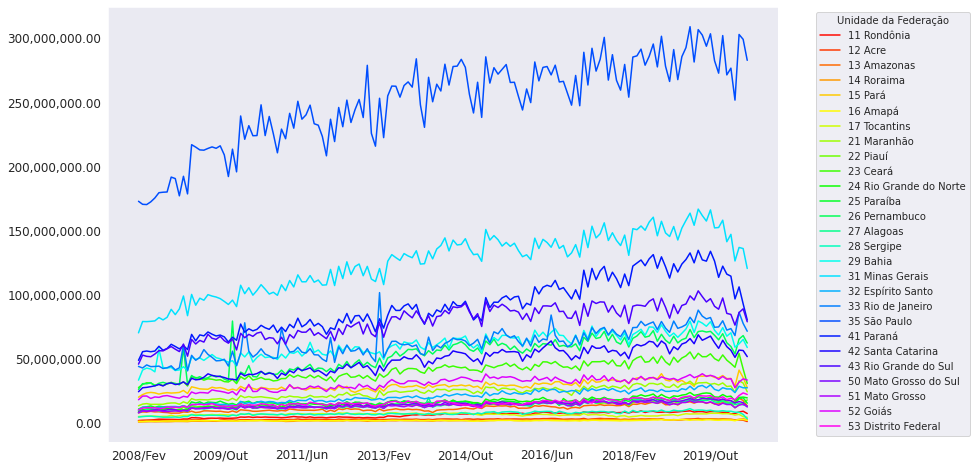

In [21]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('dark')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
usaveis.iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Sudeste e Centro-Oeste) de cada estado.

In [22]:
coluna_regiao=[]
regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for i in usaveis.iterrows():
    
    estado=i[0]
    numero_regiao = int(estado.split(' ')[0])
    novo_estado = estado.split(' ', maxsplit =1)[1]
    novo_usaveis = usaveis.rename(index={estado:novo_estado})
    
    if numero_regiao < 20:
        coluna_regiao.append(regioes[0])
    elif numero_regiao < 30:
        coluna_regiao.append(regioes[1])
    elif numero_regiao < 40:
        coluna_regiao.append(regioes[2])
    elif numero_regiao < 50:
        coluna_regiao.append(regioes[3])
    else:
        coluna_regiao.append(regioes[4])

novo_usaveis['Região']=coluna_regiao
novo_usaveis.head(10)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2

###Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)


###Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente


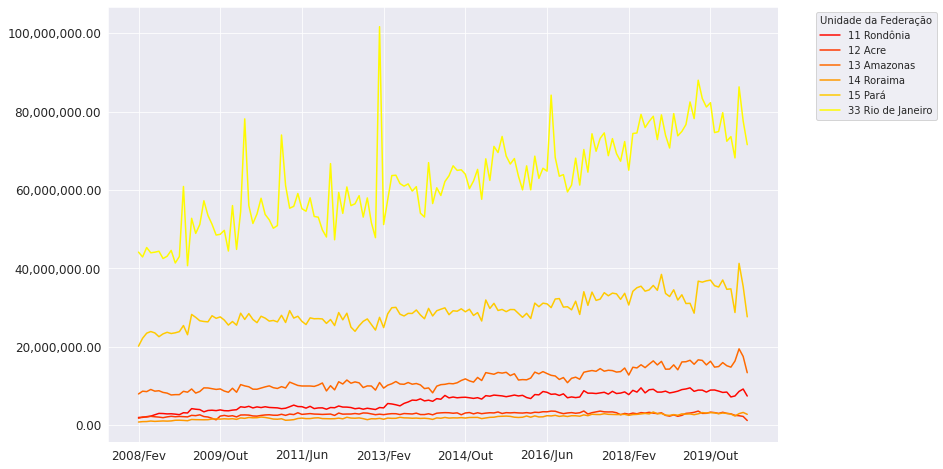

In [23]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
usaveis.loc[['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará', '33 Rio de Janeiro']].iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



### Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue


###Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

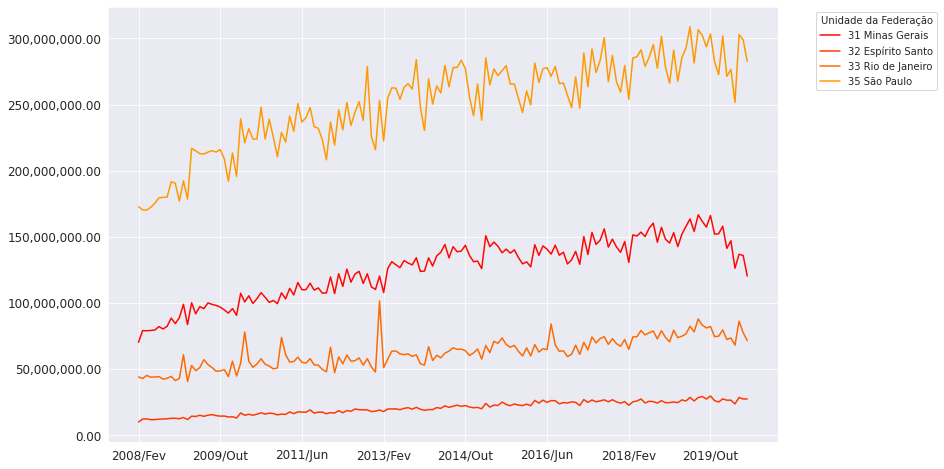

In [24]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
cd = novo_usaveis.loc[novo_usaveis['Região'] == 'Sudeste']
cd = cd.drop(['Região'], axis=1)
cd.iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

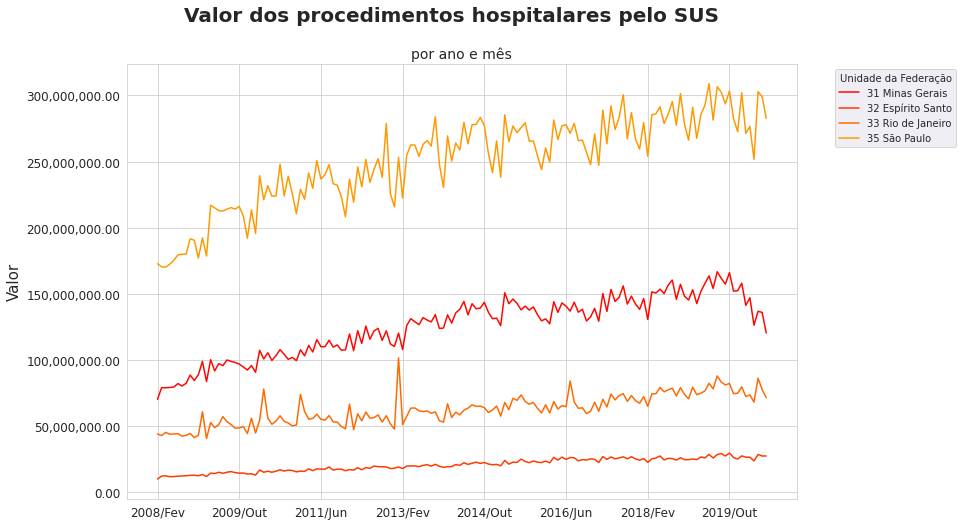

In [25]:
fig, ax = plt.subplots(figsize=(12,8)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("gist_rainbow", 27))
cd = novo_usaveis.loc[novo_usaveis['Região'] == 'Sudeste']
cd = cd.drop(['Região'], axis=1)
cd.iloc[:,6:].T.plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.suptitle("Valor dos procedimentos hospitalares pelo SUS", size=20, weight='bold' )
plt.title("por ano e mês", size=14)
plt.ylabel('Valor', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unidade da Federação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()